In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.io import arff
import pprint

import os
import sys
from pathlib import Path

from sklearn.model_selection import train_test_split

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root / "src"))

## load in a ton of code
from paths import CLEAN_DATA_DIR, MODELS_DIR, SEED
from utils import *
from models import *
from viz import *

In [2]:
data = read_pickle(CLEAN_DATA_DIR, 'modeling_data.pkl')
ytrain = data['yTrain'] 
ytest = data['ytest'] 
Xtrain = data['Xtrain']
Xtest = data['Xtest']

Pickle file successfully loaded from: /Users/John/Documents/allProjects/feature-selection-analysis/data/clean/modeling_data.pkl


In [3]:
lasso_results = fit_lasso_cv(Xtrain, ytrain, seed=SEED)

In [4]:
best_rf = fit_rf_cv(Xtrain, ytrain, seed=SEED)

In [5]:
best_xgb = fit_xgb_cv(Xtrain, ytrain, seed=SEED)

Now let's write all of these to pickle files for safe keeping

In [6]:
#write_pickle(MODELS_DIR, "lasso_results.pkl", lasso_results)
#write_pickle(MODELS_DIR, "best_rf.pkl", lasso_results)
#write_pickle(MODELS_DIR, "best_xgb.pkl", lasso_results)

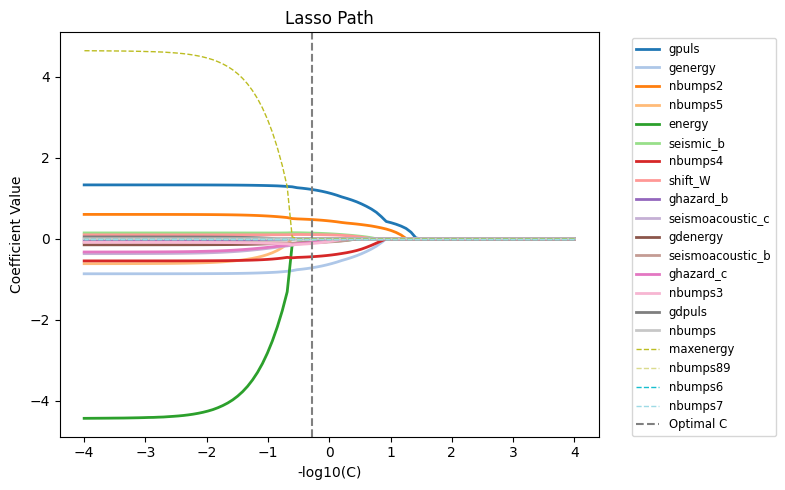

In [8]:
lasso_df = plot_lasso_paths(lasso_results)

In [14]:
energy_corr = round(Xtrain['maxenergy'].corr(Xtrain['energy']),2)
print(f"Correlation between Energy and Max Energy: {energy_corr}")

Correlation between Energy and Max Energy: 0.99


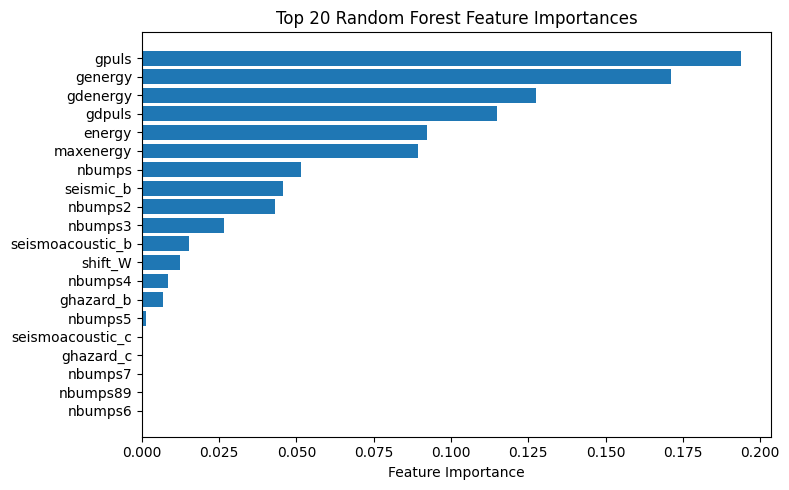

In [9]:
rf_df = plot_rf_feature_importance(best_rf, Xtrain.columns, top_n=20)

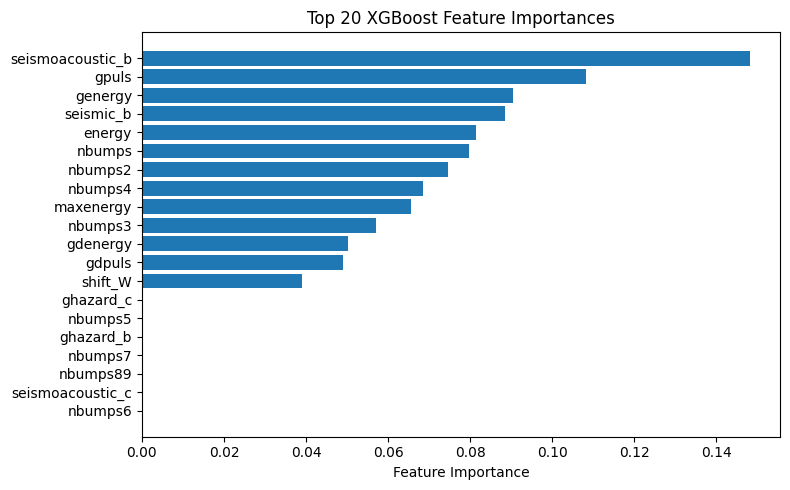

In [10]:
xgb_df = plot_xgb_feature_importance(best_xgb, Xtrain.columns, top_n=20)

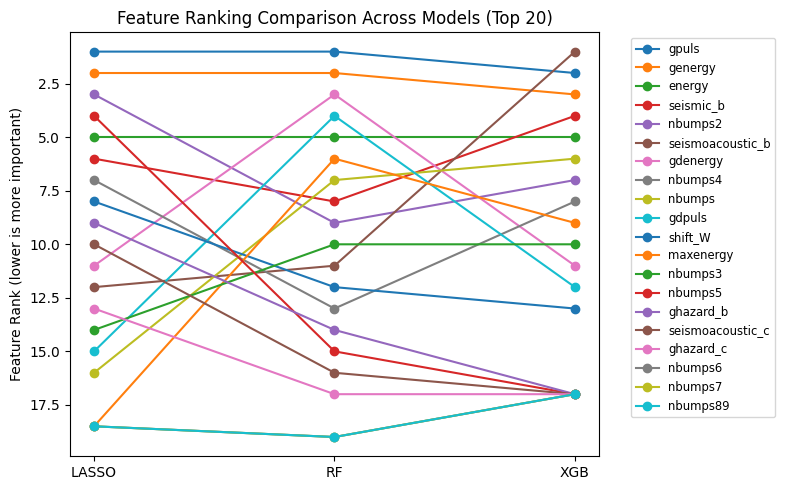

In [11]:
plot_feature_ranking_comparison(lasso_df, rf_df, xgb_df, top_n=20)